In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
cols = ['Fenestration', 'Snapshot', 'Axis']
for i in range(1, 259):
        cols.append("Values" + str(i))
df_6agf_1 = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/6AGF_1_tunnel_profiles.csv", usecols=cols)
df_6agf_1.head()

,Fenestration,Snapshot,Axis,Values1,Values2,Values3,Values4,Values5,Values6,Values7,...,Values249,Values250,Values251,Values252,Values253,Values254,Values255,Values256,Values257,Values258
0,D1-2,1.pdb,X,74.6438,74.8819,75.1867,75.4917,75.7966,76.1015,76.3904,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,D1-2,1.pdb,Y,60.3005,60.5385,60.7807,61.0251,61.2695,61.5139,61.836,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,D1-2,1.pdb,Z,50.3092,50.6772,50.9907,51.3026,51.6145,51.9264,52.1189,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,D1-2,1.pdb,distance,1.7457,1.85753,2.11473,2.45012,2.83445,3.2504,3.7097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,D1-2,1.pdb,length,1.7457,2.2457,2.7457,3.2457,3.7457,4.2457,4.7457,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
def extract_rad_len(df, fenestration):

    df = df[df['Fenestration'] == fenestration].drop(columns=['Fenestration'])

    df_len = df[df['Axis'] == ' length'].drop(columns=['Axis']).set_index('Snapshot').stack().reset_index(level=0).rename(columns={0:'Tunnel length'}).set_index('Snapshot')
    df_rad = df[df['Axis'] == ' R'].drop(columns=['Axis']).set_index('Snapshot').stack().reset_index(level=0).rename(columns={0:'Tunnel radius'}).set_index('Snapshot')

    df_rad_len = pd.concat([df_rad, df_len], axis=1).dropna().reset_index(level=0)

    snapshot_list = []
    for i in range(20, 2001, 20):
        snapshot_list.append(str(i)+".pdb")

    df_skip = df_rad_len[df_rad_len['Snapshot'].isin(snapshot_list)]

    return df_skip.astype({'Tunnel radius': 'float64', 'Tunnel length': 'float64'})

Text(0.5,1,'6AGF:D1-2 (rep1)')

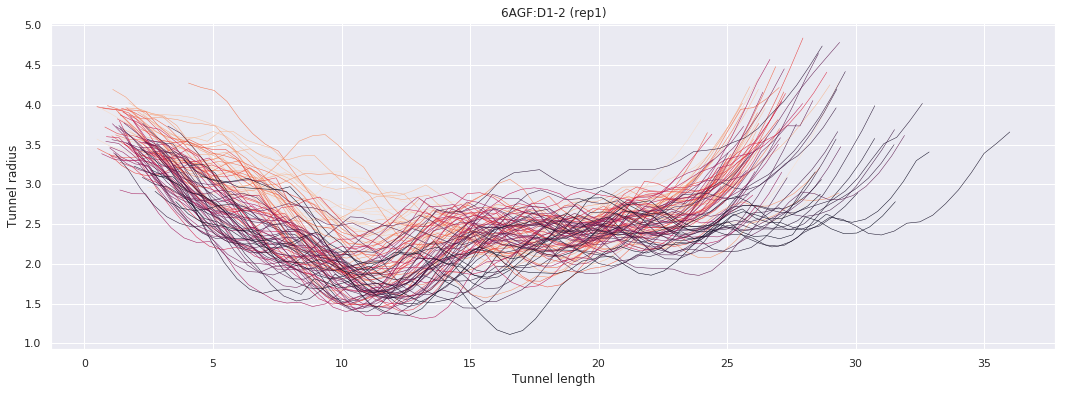

In [51]:
df1 = extract_rad_len(df_6agf_1, 'D1-2')

# config plot visuals
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_context("notebook", rc={"lines.linewidth": .5})

sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df1, legend=False)
plt.title("6AGF:D1-2 (rep1)")

Text(0.5,1,'6AGF:D2-3 (rep1)')

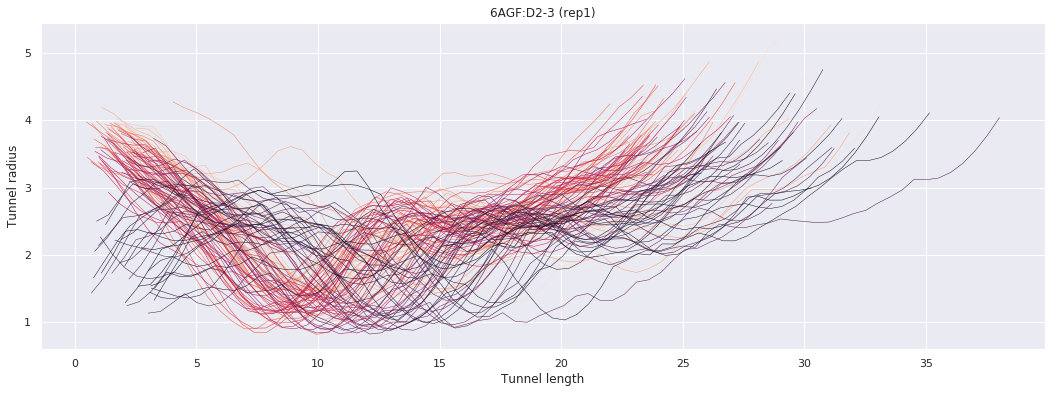

In [42]:
df1 = extract_rad_len(df_6agf_1, 'D2-3')

# config plot visuals
sns.set(rc={'figure.figsize':(18, 6)})
sns.set_context("notebook", rc={"lines.linewidth": .5})

sns.lineplot('Tunnel length', 'Tunnel radius', ci=None, hue='Snapshot', palette='rocket_r', data=df1, legend=False)
plt.title("6AGF:D2-3 (rep1)")

# Tunnel curvature for each fenestration/pore/sf

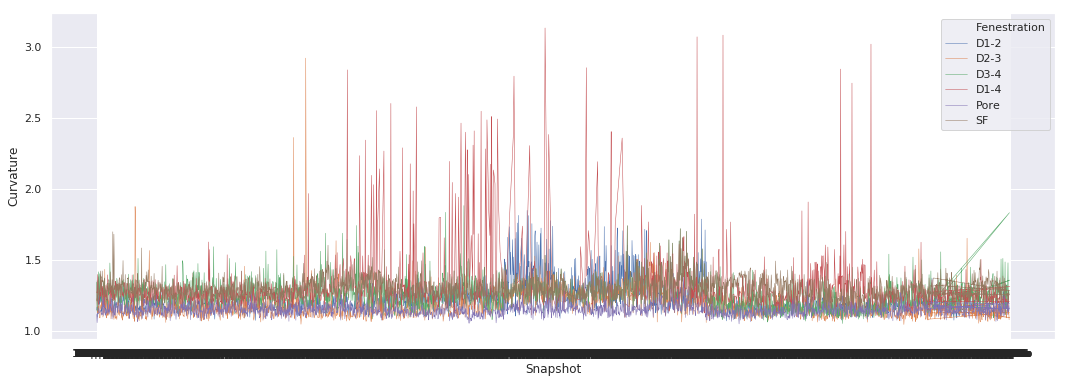

In [55]:

df_6agf_1_curv = pd.read_csv("/home/elaine/elaine_data/caver_3.0/analysis_fenestrations/6AGF_1_tunnel_profiles.csv", usecols=['Fenestration', 'Snapshot', 'Curvature'])

sns.lineplot('Snapshot', 'Curvature', ci=None, hue='Fenestration', data=df_6agf_1_curv)